In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from fastai.data.transforms import get_image_files
from fastai.vision.data import SegmentationDataLoaders
from os import path
from fastseg.image import colorize, blend
from PIL import Image
from tqdm import tqdm
import albumentations as A

In [2]:
base_dir = "/media/nevin/Trash Games1/culane"
processed_dir = path.join(base_dir, "processed/")
test_dir = path.join(base_dir, "test/")
image_files = get_image_files(test_dir)

def text_label_func(input):
    return f"{test_dir}{input.stem}.lines.txt"


def label_func(input):
    return f"{processed_dir}labels/{input.stem}.seg.png"


def save_func(input):
    return f"{processed_dir}images/{input.stem}.jpg"


def get_points(label_file):
    with open(label_file) as file:
        lines = file.readlines()
        lines = [line.rstrip() for line in lines]

    points = [[] for line in lines]
    for idx, line in enumerate(lines):
        split = line.split(" ")
        for i in range(0, len(split), 2):
            points[idx].append([int(float(split[i])), int(float(split[i + 1]))]) # it works
            # print(split[i], split[i + 1])
    
    return np.array(points, dtype=object)


def gen_seg(image, points):
    h, w, c = image.shape
    seg_image = np.zeros((h, w), np.uint8)
    for i in range(len(points)):
        point = np.asarray(points[i])
        x = point[:, 0]
        y = point[:, 1]

        # poly = np.polyfit(x, y, 3)
        # poly_y = [np.polyval(poly, i) for i in x]

        draw_points = (np.asarray([x, y]).T).astype(np.int32)
        # print(point)

        seg_image = cv.polylines(seg_image, [draw_points], False, color=(1, 0, 0), thickness=10)
    
    return seg_image

print(label_func(image_files[0]))

/media/nevin/Trash Games1/culane/processed/labels/00000.seg.png


In [82]:
image = image_files[100]
l_file = label_func(image)



In [83]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

img = cv.imread(str(image))
# h, w, c = img.shape

all_points = get_points(l_file)
    # plt.plot(x, poly_y)
    # plt.show()

# plt.imshow(gen_seg(img, all_points))
seg = gen_seg(img, all_points)
img = img[0:500, 400:1200]
seg = seg[0:500, 400:1200]
print(img.shape)

img = Image.fromarray(img)
colorized = colorize(seg)
blended = blend(img, colorized)
plt.imshow(blended)

# fig, axs = plt.subplots(2)
# axs[0].imshow(img)
# axs[1].imshow(seg)

# for point in points:
    # img = cv.circle(img, (point[0], point[1]), radius=2, color=(0, 0, 255), thickness=10)

# plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: '/media/nevin/Trash Games1/culane/processed/labels/02760.seg.png'

<Figure size 1332x756 with 0 Axes>

In [87]:
for image in tqdm(image_files):
    save_path = save_func(image)
    label_save_path = label_func(image)
    label = text_label_func(image)

    img = cv.imread(str(image))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    points = get_points(label)

    seg = gen_seg(img, points)

    img = img[0:500, 400:1200]
    seg = seg[0:500, 400:1200]

    img = Image.fromarray(img)
    img.save(save_path)

    seg = Image.fromarray(seg)
    seg.save(label_save_path)

    # result = cv.imwrite(save_path, seg)
    # print(result)

# seg_img = cv.imread("/media/nevin/Trash Games1/culane/test/00000.seg.png")
# count = np.count_nonzero(seg_img == 1)
# print(count)
# plt.imshow(seg_img)

100%|██████████| 180/180 [00:04<00:00, 38.97it/s]


In [4]:
codes = ["lane"]

In [5]:
processed_image_files = get_image_files(path.join(processed_dir, "images/"))

dls = SegmentationDataLoaders.from_label_func(
    path="/media/nevin/Trash Games1/culane/processed",
    bs=8,
    fnames=processed_image_files,
    label_func=label_func,
)

2
18


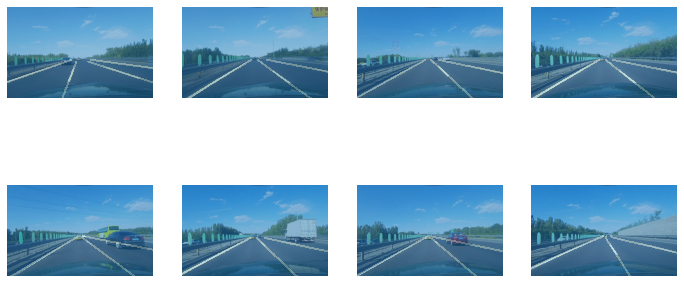

In [8]:
dls.show_batch(max_n=8)
print(len(dls))
print()